Primeras 3 filas de los datos:
         X1        X2  y
0  2.526093  0.321050  0
1  0.366954  0.031462  0
2  0.768219  0.717486  0


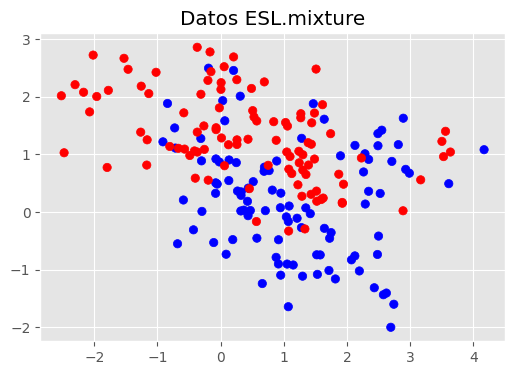


Datos de entrenamiento (X_train): (160, 2)
Etiquetas de entrenamiento (y_train): (160,)

Modelo SVM lineal entrenado.


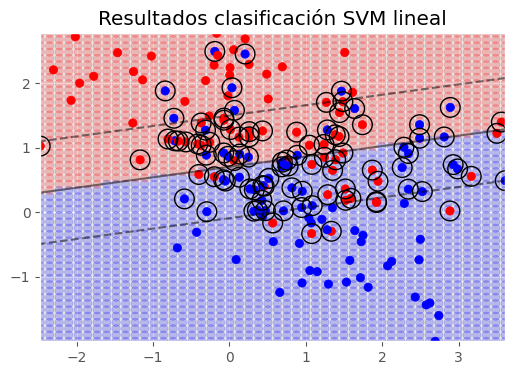


El accuracy de test es: 70.0%


In [11]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Nota: mlxtend.plotting.plot_decision_regions no se utiliza en el código final,
# pero la importación se mantiene.
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Datos e inspección inicial
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
         + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
print("Primeras 3 filas de los datos:")
print(datos.head(3))

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture");
plt.show() # Mostrar el gráfico inicial

# 2. División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']

# CORRECCIÓN: Se elimina .values.reshape(-1,1) en 'y' para que SVC.fit
# reciba un vector de etiquetas 1D.
X_train, X_test, y_train, y_test = train_test_split(
                                             X,
                                             y, # Corregido: pasar y directamente
                                             train_size   = 0.8,
                                             random_state = 1234,
                                             shuffle      = True
                                         )
print(f"\nDatos de entrenamiento (X_train): {X_train.shape}")
print(f"Etiquetas de entrenamiento (y_train): {y_train.shape}")


# 3. Creación y entrenamiento del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)
print("\nModelo SVM lineal entrenado.")

# 4. Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y_grid_vals = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X_grid = np.meshgrid(y_grid_vals, x)
grid = np.vstack([X_grid.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))

# Puntos del grid (fondo)
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)

# Puntos de entrenamiento (datos originales)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte (puntos clave que definen el límite)
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación (nivel 0) y márgenes (niveles -1 y 1)
ax.contour(
    X_grid,
    Y,
    modelo.decision_function(grid).reshape(X_grid.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");
plt.show() # Mostrar el gráfico final

# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

# Accuracy de test del modelo
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")